# **Veri Analizi**


## *Veri Setinin Tanımı:*

---



Bu veri seti, 21 doğrusal değerli içerir.

Bu veri seti, bir hastanede doğrudan ve manuel olarak hastaların bilgilerinden hazırlanmıştır. Tüm bu veriler, Irak'ın Erbil şehrinde bulunan özel bir hastane ve kalp merkezi olan Medical Help Center'da toplanmıştır. Bu veri setini oluşturmanın temel amacı, bir hastanın kalp hastalığından muzdarip olup olmadığını tahmin etmek için yerli hastaların kalp sorunları hakkındaki bilgileri üzerinde çalışmaktır. İlk olarak, doktora gelen hastalar için veriler asistan doktorlar ve kardiyologlar tarafından manuel olarak kağıt sayfalara yazılmıştır. Daha sonra tüm veriler araştırmacı tarafından çok dikkatli ve doğru bir şekilde excel dosyasına kaydedilir. Toplanan veriler beş kategoriye ayrılmıştır. Bazıları hastanın demografik bilgileri, bazıları hastanın öyküsü, bazıları fizik muayene ve semptomatik, bazıları tıbbi laboratuvar testleri ve bazıları da tanısal özelliklerdir.

Veri setinin özellikleri tıp doktorlarının tavsiyelerinden seçilmiştir. Kalp hastalığı ile ilgili etkili özellikler için araştırma makalelerinin önerileri de dikkate alınır. Kardiyovasküler hastalığa katkıda bulunan ortak faktörler veya özellikler tanımlanmıştır. "Hedef" alanı, hastada kalp hastalığının varlığına atıfta bulunur. Düzgün bir şekilde tamamlandıktan sonra hastaların isimleri veri tabanından kaldırıldı. Tüm süreç aşağıdaki gibi dört dosya içerir:

## *Veri Setinin İçeriği*

---



Veri örnek sayısı: 350   
Öznitelik sayısı: 21

Özniteliği eksik veri sayısı: 18 (yaş özniteliği eksik). Eksik veriler boşluk ile temsil edilmiştir.

### Öznitelik Bilgileri:

---



**Öznitelikler:**

*   1: age
*   2: sex: (1 kadın , 0 erkek)
*   3: smoke: (0=Hayır, 1=Evet)
*   4: years: (Sigara içiyorsa, sigara içilen yıl sayısı)
*   5: ldl: (Hastanın LDL-Kolesterol oranı)
*   6: chp: Göğüs ağrısı tipi (1=Tipik angina, 2=Atipik angina, 3=Anjinal olmayan ağrı, 4=Asemptomatik).
*   7: height: Hastanın cm cinsinden boyu 
*   8: weight: Hastaların kg cinsinden ağırlığı.
*   9: fh: Ailede kalp hastalığı öyküsü.
*   10: active: Hastanın aktif olup olmadığı (0=Hayır, 1=Evet).
*   11: lifestyle: Yaşanılan yer (1=Şehir, 2=Kasaba, 3=Köy).
*   12: ihd: Hastanın herhangi bir kalp kateterizasyonu veya kalbe herhangi bir müdahalesi var mı? (0=Hayır, 1=Evet).
*   13: hr: Nabız oranı.
*   14: dm: Hastanın diyabeti var mı (0=Hayır, 1=Evet).
*   15: bpsys: Sistolik Kan Basıncı oranı.
*   16: bpdias: Kan Basıncının Diyastolik Oranı.
*   17: htn: Hastada hipertansiyon var mı (0=Hayır, 1=Evet).
*   18: ivsd: Bir Yankı parametresi (İnterventriküler Sepal ve Diyastol).
*   19: ecgpatt: EKG testinin dört kategorisini içerir: (1=ST-Elevation, 2=ST-Depression, 3=T-Inversion, 4=Normal).
*   20: qwave: Q dalgasının varlığı (0=Hayır, 1=Evet)

**Sınıf Bilgisi: (0,1) değerlerini alır**
*   21 : target (class bilgisi): Hastanın kalp hastalığı olup olmadığı (0=kalp hastalığı yok, 1=kalp hastalığı var).

## *Data üzerinde işlem yapması*

---



### Dataseti çağırmak

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn import preprocessing
from matplotlib.ticker import NullFormatter
from fast_ml.model_development import train_valid_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
%matplotlib inline

In [2]:
df = pd.read_csv('Dataset.csv')
print("Veri seti örneği:")
df.head()

Veri seti örneği:


,age,sex,smoke,years,ldl,chp,height,weight,fh,active,...,ihd,hr,dm,bpsys,bpdias,htn,ivsd,ecgpatt,qwave,target
0,65.0,0,0,0,69.0,4,168,111.0,1,0,...,1,98,1,120,80,1,0,4,0,0
1,54.0,1,0,0,117.0,2,145,81.0,0,0,...,0,85,0,130,80,0,0,4,0,0
2,61.0,0,1,45,86.2,2,160,72.0,0,0,...,0,63,1,150,70,1,0,2,0,1
3,57.0,0,0,0,76.0,2,176,78.0,1,0,...,1,74,1,120,70,0,0,3,0,1
4,62.0,1,0,0,160.0,3,154,61.0,0,0,...,0,89,1,110,70,0,0,1,0,1


### Eksik veri kontrolu ve tamamlanması

---



Buradaki yaptığım işlem dataseti hedef sınıfına göre ayırdım, ondan sonra her sınıfın 34 sütünün ortalaması hesaplayıp boş olan değerlere atadım

In [3]:
df.isnull().values.any()

True

In [4]:
df = df.dropna()
df

,age,sex,smoke,years,ldl,chp,height,weight,fh,active,...,ihd,hr,dm,bpsys,bpdias,htn,ivsd,ecgpatt,qwave,target
0,65.0,0,0,0,69.0,4,168,111.0,1,0,...,1,98,1,120,80,1,0,4,0,0
1,54.0,1,0,0,117.0,2,145,81.0,0,0,...,0,85,0,130,80,0,0,4,0,0
2,61.0,0,1,45,86.2,2,160,72.0,0,0,...,0,63,1,150,70,1,0,2,0,1
3,57.0,0,0,0,76.0,2,176,78.0,1,0,...,1,74,1,120,70,0,0,3,0,1
4,62.0,1,0,0,160.0,3,154,61.0,0,0,...,0,89,1,110,70,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,46.0,1,0,0,111.0,4,143,66.5,0,0,...,0,107,0,150,90,1,1,1,0,0
347,42.0,0,1,17,164.0,2,164,79.0,1,1,...,0,112,0,110,70,0,0,1,0,0
348,51.0,0,0,0,116.0,4,180,92.0,0,1,...,0,81,0,105,80,1,0,4,0,0
349,45.0,1,0,0,102.0,3,166,79.0,0,0,...,0,96,0,110,70,0,0,4,0,0


### Özniteliklerin sınıflamadaki ayırt ediciliklerinin hesaplanması:

---



In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
array = df.values
X = array[:,0:20]
Y = array[:,20]
# feature extraction
test = SelectKBest(score_func=f_classif, k='all')
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
features = fit.transform(X)

Kolay okunması için büyükten küçüğe sıralayacağım:

In [6]:
scores = fit.scores_
feature_numbers = scores.argsort()
sorted_scores = np.sort(scores)[::-1] / scores.sum()

print("Feature Importances:\n")
for i in range(len(scores)):  
    print('{0:12}{1}'.format(df.columns[feature_numbers[i]] +  ':', sorted_scores[i]))

Feature Importances:

hr:         0.7461234232795414
sex:        0.10955774412687547
htn:        0.053694655223828276
chp:        0.028891474200243034
bpdias:     0.025738421944040895
ivsd:       0.008029896516294224
bpsys:      0.008021157414321833
smoke:      0.004864994617797069
ldl:        0.00434391552477463
years:      0.00210627235648458
fh:         0.0020648438807396967
weight:     0.0018241179903409161
height:     0.0013291344402447118
lifestyle:  0.0013039661008417275
dm:         0.0006236208480725152
active:     0.0004603499284436999
ihd:        0.0004585573261552263
age:        0.00039894995254545165
qwave:      0.00010996051049576378
ecgpatt:    5.45438179189075e-05


sonucunda: 0.0001'den düşük ayırt edicilik skoruna sahip olan feature ecgpatt değerlerinin veriden çıkartılmasına karar aldım.

In [7]:
df = df.drop(["ecgpatt"], axis=1) 

# **Sınıflama**

### Kütüphaneleri çağırmak

---



In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from fast_ml.model_development import train_valid_test_split
from sklearn.naive_bayes import MultinomialNB

### Veri öğrenme ve veri test grublara ayırmak

---



In [47]:
X = df.drop(columns = ['target']).copy()
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(283, 19)
(283,)
(50, 19)
(50,)


### Veri öğrenme grubu modelleme

---



In [48]:
Gaussian_model = GaussianNB()
SVC_model = SVC()
KNN_model = KNeighborsClassifier(n_neighbors=3)
MNB_model = MultinomialNB()

Gaussian_model.fit(X_train, y_train)
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)
MNB_model.fit(X_train, y_train)

Gaussian_prediction = Gaussian_model.predict(X_test)
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)
MNB_prediction = MNB_model.predict(X_test)

### Başarı oranı yazdırma

---



In [49]:
# Doğruluk puanı değerlendirmenin en basit yoludur
print(f'SVC accuracy        : {100*(accuracy_score(SVC_prediction, y_test)):.2f}%')
print(f'KNN accuracy        : {100*(accuracy_score(KNN_prediction, y_test)):.2f}%')
print(f'GaussianNB accuracy : {100*(accuracy_score(Gaussian_prediction, y_test)):.2f}%')
print(f'Naive Bayes accuracy: {100*(accuracy_score(MNB_prediction, y_test)):.2f}%')

SVC accuracy        : 60.00%
KNN accuracy        : 56.00%
GaussianNB accuracy : 68.00%
Naive Bayes accuracy: 66.00%


### Cross-Validation uygulamak

---



In [12]:
from sklearn.model_selection import cross_val_score

scores_SVC = cross_val_score(SVC_model, X, y, cv=4, scoring='accuracy')
scores_KNN = cross_val_score(KNN_model, X, y, cv=9, scoring='accuracy')
scores_Gaussian = cross_val_score(Gaussian_model, X, y, cv=4, scoring='accuracy')
scores_MNB = cross_val_score(MNB_model, X, y, cv=5, scoring='accuracy')

print(f'SVC cross-validation accuracy        : {100*(scores_SVC.mean()):.2f}%')
print(f'KNN cross-validation accuracy        : {100*(scores_KNN.mean()):.2f}%')
print(f'GaussianNB cross-validation accuracy : {100*(scores_Gaussian.mean()):.2f}%')
print(f'Naive Bayes cross-validation accuracy: {100*(scores_MNB.mean()):.2f}%')

SVC cross-validation accuracy        : 64.57%
KNN cross-validation accuracy        : 59.76%
GaussianNB cross-validation accuracy : 72.38%
Naive Bayes cross-validation accuracy: 67.57%


### Sonuç

---



Öğrettiğim 4 modüllerden en başarılı modülü GaussianNB Modülü

Cross-Validation uygulandığında da en başarılı modülü GaussianNB Modülü

In [13]:
def plot_ccm(models):
    class_names = [x for x in range(0,2)]
    for model in models:
        fig, ax = plt.subplots(figsize=(10, 10))
        disp = plot_confusion_matrix(model, X_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Greens,
                                     #normalize=normalize,
                                    ax = ax)
        disp.ax_.set_title(type(model).__name__ + " - Confusion matrix")

    plt.show()

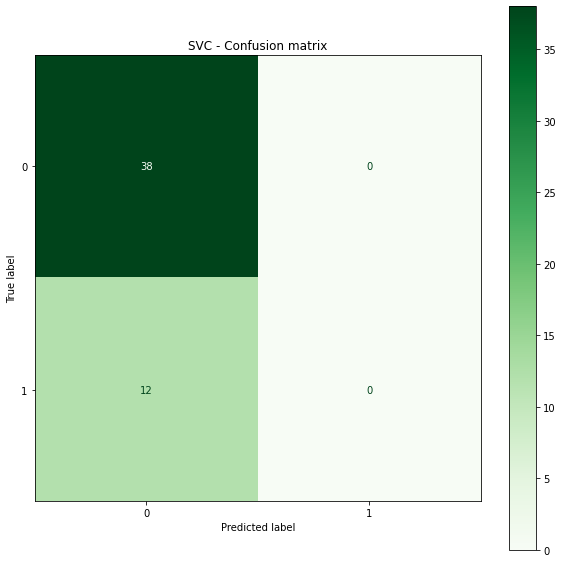

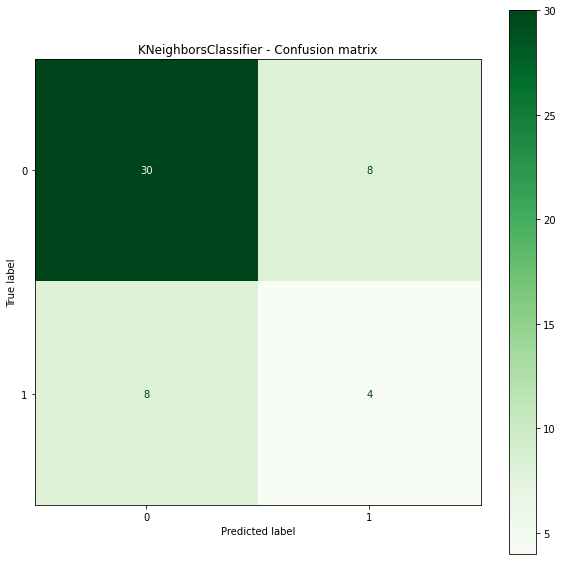

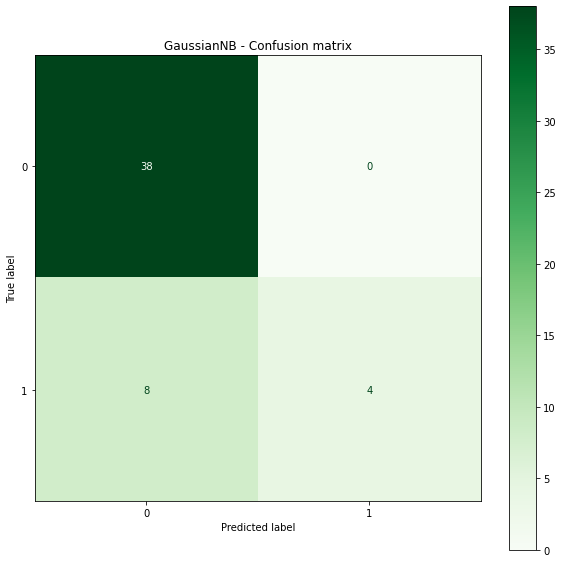

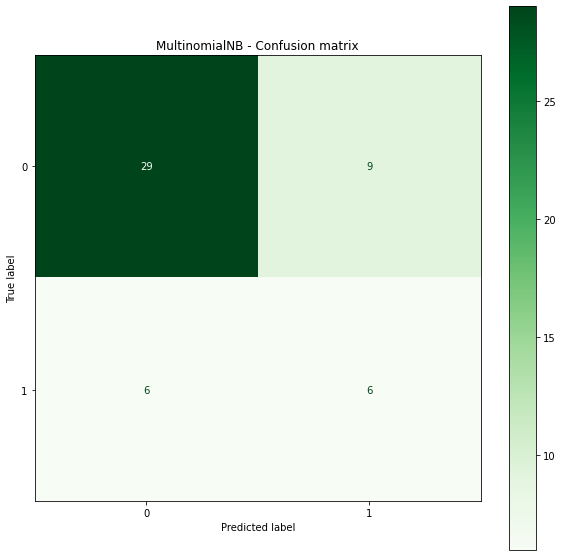

In [14]:
plot_ccm([SVC_model, KNN_model, Gaussian_model, MNB_model])

# **Kümeleme**

### Kümeleme metodleri tanımlama

---



### Kümeleme metodu

---



In [15]:
from sklearn.cluster import  AgglomerativeClustering, KMeans

features = list(df.columns)[:-1]

data = df[features]

clustering_kmeans = KMeans(n_clusters=2)
data['clusters'] = clustering_kmeans.fit_predict(data)


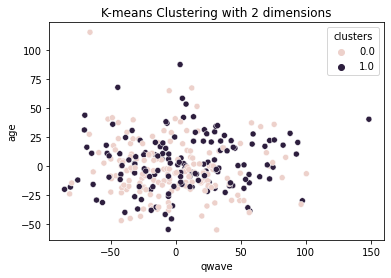

In [16]:
import seaborn as sns
from sklearn.decomposition import PCA

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['qwave','age'])

sns.scatterplot(x="qwave", y="age", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()